In [ ]:
from __future__ import absolute_import, division, print_function, unicode_literals

In [ ]:
!pip install kaggle
from google.colab import files
files.upload()
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download CelebA

Saving kaggle.json to kaggle.json
404 - Not Found


In [ ]:
!kaggle datasets download jessicali9530/celeba-dataset

100% 1.21G/1.21G [00:07<00:00, 221MB/s]
100% 1.21G/1.21G [00:07<00:00, 168MB/s]


In [ ]:
!ls
!unzip celeba-dataset.zip

celeba-dataset.zip  kaggle.json  sample_data
Archive:  celeba-dataset.zip
  inflating: list_attr_celeba.csv    
  inflating: img_align_celeba.zip    
  inflating: list_landmarks_align_celeba.csv  
  inflating: list_bbox_celeba.csv    
  inflating: list_eval_partition.csv  


In [ ]:
!ls
!unzip -qq img_align_celeba.zip

celeba-dataset.zip    list_attr_celeba.csv     list_landmarks_align_celeba.csv
img_align_celeba.zip  list_bbox_celeba.csv     sample_data
kaggle.json	      list_eval_partition.csv


In [ ]:
!ls
import os
os.chdir('img_align_celeba')
all_images = os.listdir()

celeba-dataset.zip    kaggle.json	    list_eval_partition.csv
img_align_celeba      list_attr_celeba.csv  list_landmarks_align_celeba.csv
img_align_celeba.zip  list_bbox_celeba.csv  sample_data


In [ ]:
!pip install tensorflow-gpu==2.0.0-alpha0


     |████████████████████████████████| 332.1MB 54kB/s 
     |████████████████████████████████| 61kB 26.0MB/s 
     |████████████████████████████████| 419kB 47.1MB/s 
     |████████████████████████████████| 3.0MB 32.6MB/s 


In [ ]:
import tensorflow as tf

In [ ]:
tf.__version__

'2.0.0-alpha0'

In [ ]:
# To generate GIFs
!pip install imageio

In [ ]:
import glob
import imageio
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
from tensorflow.keras import layers
import time

from IPython import display

In [ ]:
import cv2
#os.chdir('img_align_celeba_png')
from keras.preprocessing.image import array_to_img, img_to_array, load_img
def load_images(image_names):
  train_images = []
  counter = 0
  max_images = 6600
  for image in image_names:
    #if counter == max_images:
      #break
    loaded = cv2.imread(image)
    loaded = cv2.cvtColor(loaded, cv2.COLOR_BGR2RGB)
    train_images.append(loaded)
    #counter = counter+1
  train_images = [cv2.resize(img, dsize=(80, 80), interpolation=cv2.INTER_CUBIC) for img in train_images]
  train_images = [img.astype('float32')/255 for img in train_images]
  print(len(train_images))
  return train_images
train_images = load_images(all_images[0:5000])

  

Using TensorFlow backend.


5000


(80, 80, 3)
(80, 80, 3)


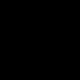

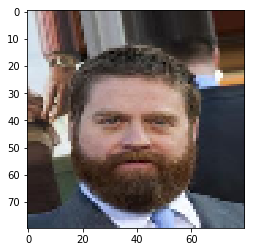

In [ ]:
print(train_images[0].shape)
#train_images = [cv2.resize(img, dsize=(80, 80), interpolation=cv2.INTER_CUBIC) for img in train_images]
print(train_images[0].shape)
from google.colab.patches import cv2_imshow
cv2_imshow(train_images[0])  
plt.imshow(train_images[0])

[[[0.44313726 0.44313726 0.44313726]
  [0.4392157  0.4392157  0.4392157 ]
  [0.44313726 0.44313726 0.44313726]
  ...
  [0.3529412  0.3529412  0.3529412 ]
  [0.36078432 0.36078432 0.36078432]
  [0.34117648 0.34117648 0.34117648]]

 [[0.44313726 0.44313726 0.44313726]
  [0.4392157  0.4392157  0.4392157 ]
  [0.44313726 0.44313726 0.44313726]
  ...
  [0.3529412  0.3529412  0.3529412 ]
  [0.36078432 0.36078432 0.36078432]
  [0.34117648 0.34117648 0.34117648]]

 [[0.44313726 0.44313726 0.44313726]
  [0.4392157  0.4392157  0.4392157 ]
  [0.44313726 0.44313726 0.44313726]
  ...
  [0.3529412  0.3529412  0.3529412 ]
  [0.36078432 0.36078432 0.36078432]
  [0.34117648 0.34117648 0.34117648]]

 ...

 [[0.3529412  0.3529412  0.3529412 ]
  [0.3529412  0.3529412  0.3529412 ]
  [0.3529412  0.3529412  0.3529412 ]
  ...
  [0.13333334 0.13333334 0.13333334]
  [0.20784314 0.20784314 0.20784314]
  [0.25882354 0.25882354 0.25882354]]

 [[0.34117648 0.34117648 0.34117648]
  [0.34117648 0.34117648 0.34117648]


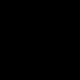

[[[0.44313726 0.44313726 0.44313726]
  [0.4392157  0.4392157  0.4392157 ]
  [0.44313726 0.44313726 0.44313726]
  ...
  [0.3529412  0.3529412  0.3529412 ]
  [0.36078432 0.36078432 0.36078432]
  [0.34117648 0.34117648 0.34117648]]

 [[0.44313726 0.44313726 0.44313726]
  [0.4392157  0.4392157  0.4392157 ]
  [0.44313726 0.44313726 0.44313726]
  ...
  [0.3529412  0.3529412  0.3529412 ]
  [0.36078432 0.36078432 0.36078432]
  [0.34117648 0.34117648 0.34117648]]

 [[0.44313726 0.44313726 0.44313726]
  [0.4392157  0.4392157  0.4392157 ]
  [0.44313726 0.44313726 0.44313726]
  ...
  [0.3529412  0.3529412  0.3529412 ]
  [0.36078432 0.36078432 0.36078432]
  [0.34117648 0.34117648 0.34117648]]

 ...

 [[0.3529412  0.3529412  0.3529412 ]
  [0.3529412  0.3529412  0.3529412 ]
  [0.3529412  0.3529412  0.3529412 ]
  ...
  [0.13333334 0.13333334 0.13333334]
  [0.20784314 0.20784314 0.20784314]
  [0.25882354 0.25882354 0.25882354]]

 [[0.34117648 0.34117648 0.34117648]
  [0.34117648 0.34117648 0.34117648]


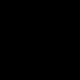

[[[113. 113. 113.]
  [112. 112. 112.]
  [113. 113. 113.]
  ...
  [ 90.  90.  90.]
  [ 92.  92.  92.]
  [ 87.  87.  87.]]

 [[113. 113. 113.]
  [112. 112. 112.]
  [113. 113. 113.]
  ...
  [ 90.  90.  90.]
  [ 92.  92.  92.]
  [ 87.  87.  87.]]

 [[113. 113. 113.]
  [112. 112. 112.]
  [113. 113. 113.]
  ...
  [ 90.  90.  90.]
  [ 92.  92.  92.]
  [ 87.  87.  87.]]

 ...

 [[ 90.  90.  90.]
  [ 90.  90.  90.]
  [ 90.  90.  90.]
  ...
  [ 34.  34.  34.]
  [ 53.  53.  53.]
  [ 66.  66.  66.]]

 [[ 87.  87.  87.]
  [ 87.  87.  87.]
  [ 87.  87.  87.]
  ...
  [ 43.  43.  43.]
  [ 58.  58.  58.]
  [ 62.  62.  62.]]

 [[ 89.  89.  89.]
  [ 89.  89.  89.]
  [ 88.  88.  88.]
  ...
  [ 52.  52.  52.]
  [ 60.  60.  60.]
  [ 63.  63.  63.]]]


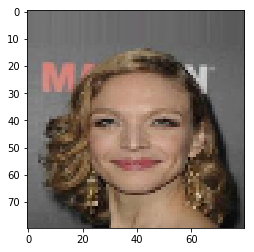

In [ ]:
print(train_images[1])
cv2_imshow(train_images[1])
#train_images = [img.astype('float32')/255 for img in train_images]
print(train_images[1])
cv2_imshow(train_images[1])  
plt.imshow(train_images[1])

plt.imshow(np.rint(train_images[1]*255).astype('int'), cmap='gray')
print(np.rint(train_images[1]*255))

In [ ]:
# Batch and shuffle the data
BUFFER_SIZE = 6600
BATCH_SIZE = 32
train_dataset = tf.data.Dataset.from_tensor_slices(train_images).shuffle(BUFFER_SIZE).batch(BATCH_SIZE)

## Create the models

Both the generator and discriminator are defined using the [Keras Sequential API](https://www.tensorflow.org/guide/keras#sequential_model).

In [ ]:
def make_generator_model():
    model = tf.keras.Sequential()
    model.add(layers.Dense(10*10*256, use_bias=False, input_shape=(100,)))
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())

    model.add(layers.Reshape((10, 10, 256)))
    assert model.output_shape == (None, 10, 10, 256) # Note: None is the batch size

    model.add(layers.Conv2DTranspose(128, (5, 5), strides=(1, 1), padding='same', use_bias=False))
    assert model.output_shape == (None, 10, 10, 128)
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())

    model.add(layers.Conv2DTranspose(64, (5, 5), strides=(2, 2), padding='same', use_bias=False))
    assert model.output_shape == (None, 20, 20, 64)
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())
    
    #model.add(layers.Conv2DTranspose(64, (5, 5), strides=(1, 1), padding='same', use_bias=False))
    #assert model.output_shape == (None, 20, 20, 64)
    #model.add(layers.BatchNormalization())
    #model.add(layers.LeakyReLU())
    
    model.add(layers.Conv2DTranspose(32, (5, 5), strides=(2, 2), padding='same', use_bias=False))
    assert model.output_shape == (None, 40, 40, 32)
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())
    
    #model.add(layers.Conv2DTranspose(32, (5, 5), strides=(1, 1), padding='same', use_bias=False))
    #assert model.output_shape == (None, 40, 40, 32)
    #model.add(layers.BatchNormalization())
    #model.add(layers.LeakyReLU())
    
    


    model.add(layers.Conv2DTranspose(3, (5, 5), strides=(2, 2), padding='same', use_bias=False, activation='tanh'))
    assert model.output_shape == (None, 80, 80, 3)

    return model

Use the (as yet untrained) generator to create an image.

W0513 20:55:23.499962 140356005566336 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


<class 'tensorflow.python.framework.ops.EagerTensor'>
tf.Tensor(
[[[[-3.6740562e-04  6.0762337e-04  3.4495228e-04]
   [ 1.9105471e-04 -8.4713422e-05  3.0256386e-04]
   [ 4.6121996e-04 -6.8521092e-04 -6.3653244e-04]
   ...
   [-1.1338332e-03 -6.7482365e-04  3.2295240e-05]
   [ 7.7647739e-04  7.8638695e-04  1.1753695e-03]
   [ 9.8873954e-04 -1.4347438e-03  8.7167713e-04]]

  [[ 1.6773216e-04  2.9658302e-05  4.4425079e-04]
   [-1.4694188e-04  1.9297938e-04 -4.6640277e-04]
   [-7.0345064e-04  1.6645703e-04 -7.1122247e-04]
   ...
   [-1.9477609e-03  8.0477534e-04 -1.6736602e-03]
   [ 2.7414330e-04  2.3948820e-03 -1.0867988e-03]
   [ 1.2757049e-03  2.4206922e-03  8.1218011e-04]]

  [[-7.1237638e-04 -3.1084350e-05 -9.5800828e-04]
   [-6.3952437e-04  5.2038115e-05  3.1783007e-04]
   [ 7.6972868e-04 -3.3897522e-06  5.9311854e-04]
   ...
   [-8.5644471e-04  5.2624737e-04  7.4842980e-04]
   [-6.6124246e-04 -1.8741657e-03  3.3824961e-04]
   [ 2.9924833e-03 -4.0369858e-03 -2.1682412e-03]]

  ...

 

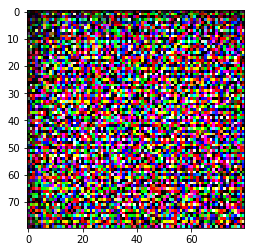

In [ ]:
generator = make_generator_model()

noise = tf.random.normal([1, 100])
generated_image = generator(noise, training=False)
print(type(generated_image))
print(generated_image)
#cv2_imshow(generated_image)
print(generated_image.shape)
generated_image_show = generated_image[0,:,:,:] * 255
print(generated_image_show)
plt.imshow(generated_image_show)
print(generated_image[0].shape)

### The Discriminator

The discriminator is a CNN-based image classifier.

In [ ]:
def make_discriminator_model():
    model = tf.keras.Sequential()
    model.add(layers.Conv2D(128, (5, 5), strides=(2, 2), padding='same',
                                     input_shape=[80, 80, 3]))
    model.add(layers.LeakyReLU())
    model.add(layers.Dropout(0.3))

    model.add(layers.Conv2D(64, (5, 5), strides=(2, 2), padding='same'))
    model.add(layers.LeakyReLU())
    model.add(layers.Dropout(0.3))
    
    #model.add(layers.Conv2D(64, (5, 5), strides=(2, 2), padding='same'))
    #model.add(layers.LeakyReLU())
    #model.add(layers.Dropout(0.3))
    
    model.add(layers.Conv2D(32, (5, 5), strides=(2, 2), padding='same'))
    model.add(layers.LeakyReLU())
    model.add(layers.Dropout(0.3))
    
    #model.add(layers.Conv2D(16, (5, 5), strides=(2, 2), padding='same'))
    #model.add(layers.LeakyReLU())
    #model.add(layers.Dropout(0.3))
    
    model.add(layers.Conv2D(16, (5, 5), strides=(2, 2), padding='same'))
    model.add(layers.LeakyReLU())
    model.add(layers.Dropout(0.3))

    model.add(layers.Flatten())
    model.add(layers.Dense(1))

    return model

Use the (as yet untrained) discriminator to classify the generated images as real or fake. The model will be trained to output positive values for real images, and negative values for fake images.

In [ ]:
discriminator = make_discriminator_model()
decision = discriminator(generated_image)
print (decision)

tf.Tensor([[0.00081263]], shape=(1, 1), dtype=float32)


## Define the loss and optimizers

Define loss functions and optimizers for both models.


In [ ]:
# This method returns a helper function to compute cross entropy loss
cross_entropy = tf.keras.losses.BinaryCrossentropy(from_logits=True)

### Discriminator loss

This method quantifies how well the discriminator is able to distinguish real images from fakes. It compares the discriminator's predictions on real images to an array of 1s, and the discriminator's predictions on fake (generated) images to an array of 0s.

In [ ]:
def discriminator_loss(real_output, fake_output):
    real_loss = cross_entropy(tf.ones_like(real_output), real_output)
    fake_loss = cross_entropy(tf.zeros_like(fake_output), fake_output)
    total_loss = real_loss + fake_loss
    return total_loss

### Generator loss
The generator's loss quantifies how well it was able to trick the discriminator. Intuitively, if the generator is performing well, the discriminator will classify the fake images as real (or 1). Here, we will compare the discriminators decisions on the generated images to an array of 1s.

In [ ]:
def generator_loss(fake_output):
    return cross_entropy(tf.ones_like(fake_output), fake_output)

The discriminator and the generator optimizers are different since we will train two networks separately.

In [ ]:
generator_optimizer = tf.keras.optimizers.Adam(1e-4)
discriminator_optimizer = tf.keras.optimizers.Adam(1e-4)

### Save checkpoints
This notebook also demonstrates how to save and restore models, which can be helpful in case a long running training task is interrupted.

In [ ]:
checkpoint_dir = './training_checkpoints'
checkpoint_prefix = os.path.join(checkpoint_dir, "ckpt")
checkpoint = tf.train.Checkpoint(generator_optimizer=generator_optimizer,
                                 discriminator_optimizer=discriminator_optimizer,
                                 generator=generator,
                                 discriminator=discriminator)

## Define the training loop



In [ ]:
EPOCHS = 50
noise_dim = 100
num_examples_to_generate = 16

# We will reuse this seed overtime (so it's easier)
# to visualize progress in the animated GIF)
seed = tf.random.normal([num_examples_to_generate, noise_dim])

The training loop begins with generator receiving a random seed as input. That seed is used to produce an image. The discriminator is then used to classify real images (drawn from the training set) and fakes images (produced by the generator). The loss is calculated for each of these models, and the gradients are used to update the generator and discriminator.

In [ ]:
# Notice the use of `tf.function`
# This annotation causes the function to be "compiled".
@tf.function
def train_step(images):
    noise = tf.random.normal([BATCH_SIZE, noise_dim])

    with tf.GradientTape() as gen_tape, tf.GradientTape() as disc_tape:
      generated_images = generator(noise, training=True)

      real_output = discriminator(images, training=True)
      fake_output = discriminator(generated_images, training=True)

      gen_loss = generator_loss(fake_output)
      disc_loss = discriminator_loss(real_output, fake_output)
      print ('Gen loss {}'.format(gen_loss))
      print ('Disc loss {}'.format(disc_loss))

    gradients_of_generator = gen_tape.gradient(gen_loss, generator.trainable_variables)
    gradients_of_discriminator = disc_tape.gradient(disc_loss, discriminator.trainable_variables)

    generator_optimizer.apply_gradients(zip(gradients_of_generator, generator.trainable_variables))
    discriminator_optimizer.apply_gradients(zip(gradients_of_discriminator, discriminator.trainable_variables))
    return gen_loss, disc_loss

In [ ]:
def train(dataset, epochs):
  for epoch in range(epochs):
    start = time.time()
    buffer_start = 0
    buffer_cursor = buffer_start + BUFFER_SIZE
    for i in range(30):
     
      train_images = load_images(all_images[buffer_start:buffer_cursor])
      train_dataset = tf.data.Dataset.from_tensor_slices(train_images).shuffle(BUFFER_SIZE).batch(BATCH_SIZE)

      for image_batch in train_dataset:
        gen_loss, disc_loss = train_step(image_batch)
        print ('Gen loss {}'.format(gen_loss))
        print ('Disc loss {}'.format(disc_loss))
      buffer_start=buffer_cursor
      buffer_cursor=buffer_cursor+ BUFFER_SIZE

    # Produce images for the GIF as we go
    display.clear_output(wait=True)
    generate_and_save_images(generator,
                             epoch + 1,
                             seed)

    # Save the model every 15 epochs
    if (epoch + 1) % 15 == 0:
      checkpoint.save(file_prefix = checkpoint_prefix)

    print ('Time for epoch {} is {} sec'.format(epoch + 1, time.time()-start))

  # Generate after the final epoch
  display.clear_output(wait=True)
  generate_and_save_images(generator,
                           epochs,
                           seed)

**Generate and save images**



In [ ]:
def generate_and_save_images(model, epoch, test_input):
  # Notice `training` is set to False.
  # This is so all layers run in inference mode (batchnorm).
  predictions = model(test_input, training=False)

  fig = plt.figure(figsize=(4,4))

  for i in range(predictions.shape[0]):
      plt.subplot(4, 4, i+1)
      plt.imshow(np.rint(predictions[i]*255).astype('int'))
      plt.axis('off')

  plt.savefig('image_at_epoch_{:04d}.png'.format(epoch))
  plt.show()

## Train the model
Call the `train()` method defined above to train the generator and discriminator simultaneously. Note, training GANs can be tricky. It's important that the generator and discriminator do not overpower each other (e.g., that they train at a similar rate).

At the beginning of the training, the generated images look like random noise. As training progresses, the generated digits will look increasingly real. After about 50 epochs, they resemble MNIST digits. This may take about one minute / epoch with the default settings on Colab.

W0514 00:04:33.244651 140356005566336 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
W0514 00:04:33.260313 140356005566336 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
W0514 00:04:33.276621 140356005566336 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
W0514 00:04:33.292617 140356005566336 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
W0514 00:04:33.308804 140356005566336 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
W0514 00:04:33.324233 140356005566336 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
W0514 00:04:33.340011 140356

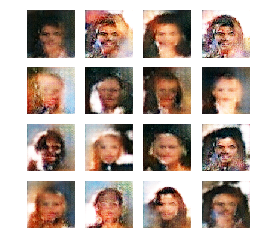

Time for epoch 6 is 1871.966811656952 sec
6600
Gen loss 1.0979470014572144
Disc loss 0.9016333222389221
Gen loss 0.9262576699256897
Disc loss 0.8768882751464844
Gen loss 0.9394891262054443
Disc loss 0.8989495038986206
Gen loss 1.0198657512664795
Disc loss 0.7239992618560791
Gen loss 1.2002954483032227
Disc loss 0.9823858141899109
Gen loss 1.1784169673919678
Disc loss 0.7908810973167419
Gen loss 1.3654661178588867
Disc loss 0.7018259167671204
Gen loss 1.3899685144424438
Disc loss 0.7059766054153442
Gen loss 1.2815531492233276
Disc loss 0.870866060256958
Gen loss 1.1226146221160889
Disc loss 0.7856612205505371
Gen loss 1.3184466361999512
Disc loss 0.7034172415733337
Gen loss 1.1914281845092773
Disc loss 1.0454504489898682
Gen loss 1.1788182258605957
Disc loss 0.8221840858459473
Gen loss 1.1520267724990845
Disc loss 0.870997428894043
Gen loss 1.1052300930023193
Disc loss 0.9164412021636963
Gen loss 1.162461280822754
Disc loss 0.7074604034423828
Gen loss 1.301656723022461
Disc loss 0.74962

In [ ]:
%%time
train(train_dataset, EPOCHS)

Restore the latest checkpoint.

In [ ]:
checkpoint.restore(tf.train.latest_checkpoint(checkpoint_dir))

## Create a GIF


In [ ]:
# Display a single image using the epoch number
def display_image(epoch_no):
  return PIL.Image.open('image_at_epoch_{:04d}.png'.format(epoch_no))

In [ ]:
display_image(EPOCHS)

Use `imageio` to create an animated gif using the images saved during training.

In [ ]:
anim_file = 'dcgan.gif'

with imageio.get_writer(anim_file, mode='I') as writer:
  filenames = glob.glob('image*.png')
  filenames = sorted(filenames)
  last = -1
  for i,filename in enumerate(filenames):
    frame = 2*(i**0.5)
    if round(frame) > round(last):
      last = frame
    else:
      continue
    image = imageio.imread(filename)
    writer.append_data(image)
  image = imageio.imread(filename)
  writer.append_data(image)

import IPython
if IPython.version_info > (6,2,0,''):
  display.Image(filename=anim_file)

If you're working in Colab you can download the animation with the code below:

In [ ]:
try:
  from google.colab import files
except ImportError:
  pass
else:
  files.download(lite_model_path)

## Next steps


This tutorial has shown the complete code necessary to write and train a GAN. As a next step, you might like to experiment with a different dataset, for example the Large-scale Celeb Faces Attributes (CelebA) dataset [available on Kaggle](https://www.kaggle.com/jessicali9530/celeba-dataset/home). To learn more about GANs we recommend the [NIPS 2016 Tutorial: Generative Adversarial Networks](https://arxiv.org/abs/1701.00160).
